# Practico 3

In [64]:
%matplotlib inline
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


# Función para simplificar el ploteo de 1 o 2 imágenes 
def plotear(img, fsize = (8, 8)):
    fig = plt.figure(figsize = fsize, dpi = 130)
    if len(img) == 1:
        img1=plt.subplot(111)
        img1.imshow(img[0], cmap='gray')
    if len(img) == 2:
        img1=plt.subplot(121)
        img1.imshow(img[0], cmap='gray')
        img2=plt.subplot(122)
        img2.imshow(img[1], cmap='gray')

 ## 1. Encontrar posición del iris y medir la distancia en pixeles entre ellos.

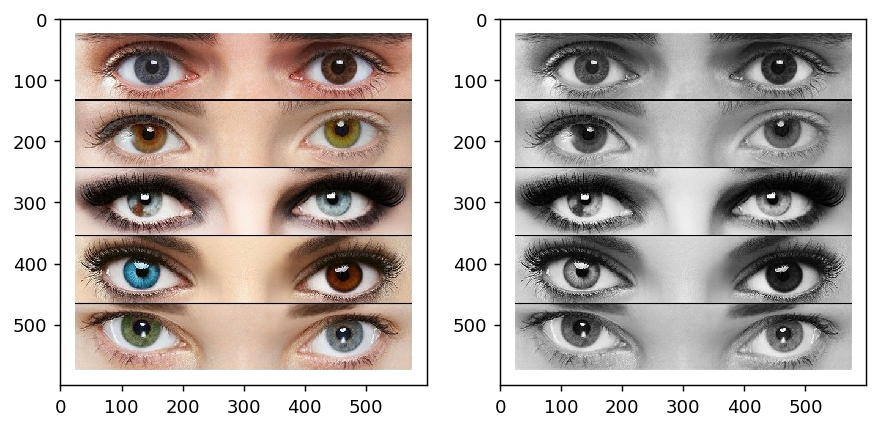

In [65]:
# Leemos la imagen
#=================
im = cv.imread('eyes.jpg')
img = cv.cvtColor(im,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

plotear([img, gray])

[[[132 504  34]
  [134 412  32]
  [464 514  32]
  [150  80  29]
  [464 418  30]
  [460 182  32]
  [144 190  32]
  [456  80  28]
  [140 298  28]
  [446 294  28]]]


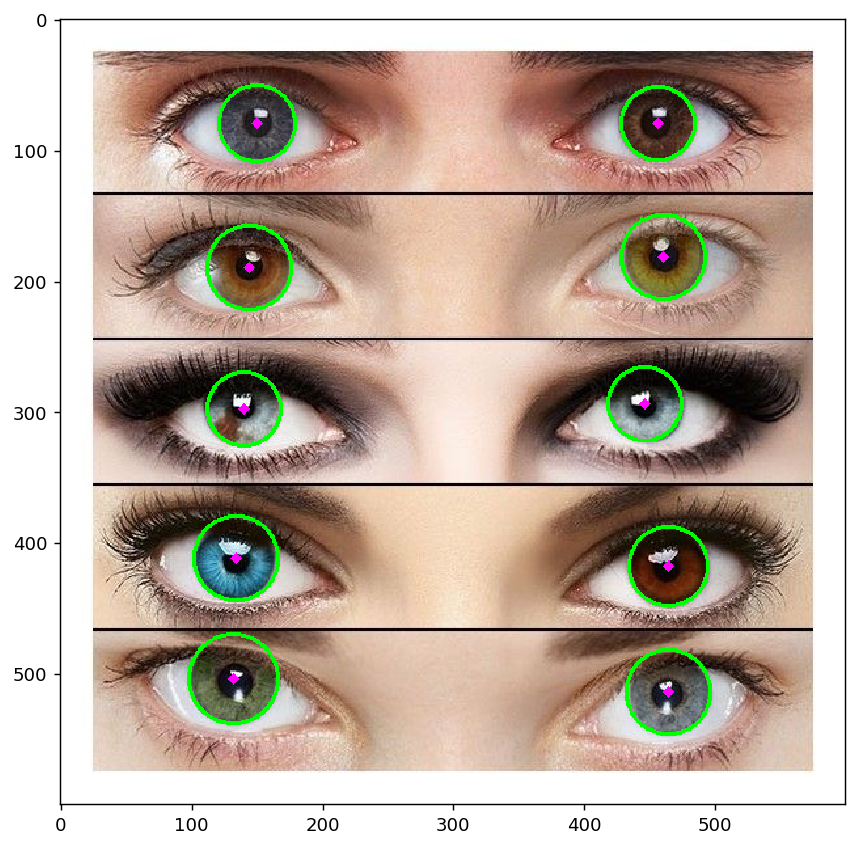

In [66]:
# Suavizado de la imagen
#=======================
blur_gray = cv.medianBlur(gray, 9)
img_out = img.copy()
# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================
umbral_alto = 40
umbral_acum = 30
circles = cv.HoughCircles(blur_gray,cv.HOUGH_GRADIENT,1,minDist=50,
                          param1=umbral_alto,param2=umbral_acum,minRadius=25,maxRadius=40)

# Matriz de círculos con posición x, y, y radio, debe ser redondeada a enteros
circles = np.uint16(np.around(circles))
print(circles)

for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(255,0,255),3)
plotear([img_out])

### Distancia entre centros

[[150  80  29]
 [456  80  28]
 [460 182  32]
 [144 190  32]
 [446 294  28]
 [140 298  28]
 [134 412  32]
 [464 418  30]
 [132 504  34]
 [464 514  32]]
[3 7 5 6 9 8 1 4 0 2]


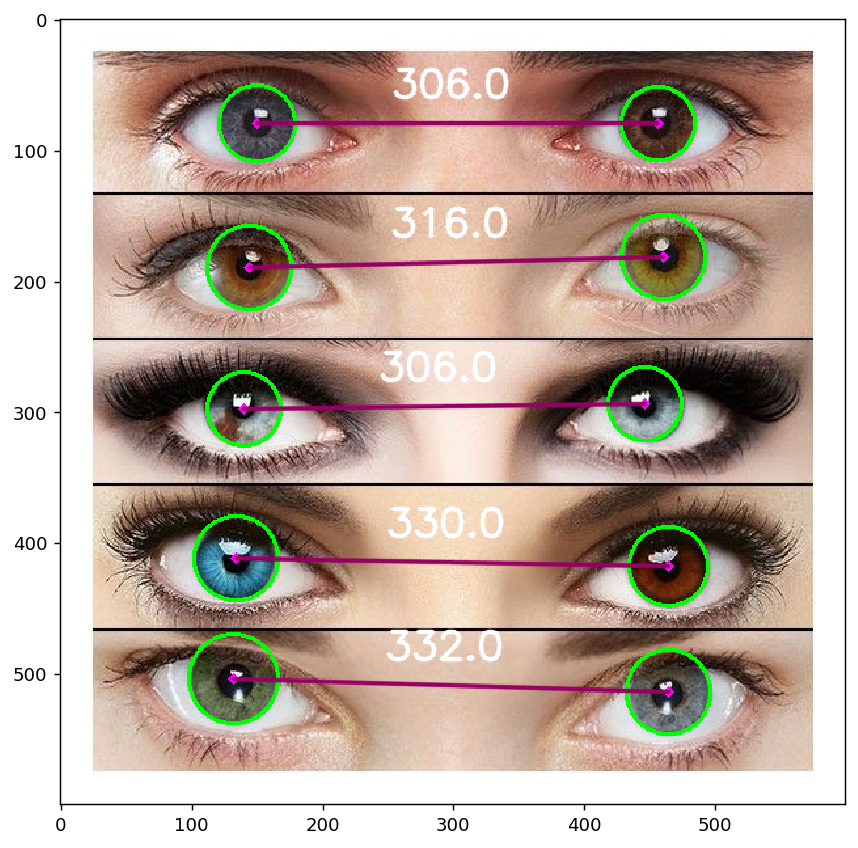

In [67]:
img_distance = img_out.copy()
# Ordenamos el vector de círculos según distancia Y:
#===================================================
order = np.argsort(circles[0, :, 1])
s_circles = circles[0, order]
print(s_circles)

for i in range(int(order.size/2)):
    eye1 = s_circles[i*2]
    eye2 = s_circles[i*2+1]
    dist = abs(float(eye2[0]) - float(eye1[0]))
    x_c = int((eye2[0] + eye1[0])/2) - 50
    y_c = int((eye2[1] + eye1[1])/2) - 20
    
    cv.line(img_distance,tuple(eye1[:2]),tuple(eye2[:2]),(150,0,100),2,cv.LINE_AA)
    cv.putText(img_distance,str(dist),(x_c,y_c),cv.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv.LINE_AA)

print(order)
plotear([img_distance])

## 2. Encontrar posición de las pupilas y medir la distancia en pixeles entre ellas.

In [71]:
#Binarizado de imagen para simplificar la busqueda de las pupilas pr ser negras.
ret,img_binary = cv.threshold(blur_gray,140,255,cv.THRESH_TRUNC)

# plotear([img_binary])

[[[454  80  12]
  [144 188  11]
  [150  80  10]
  [462 420  11]
  [464 516  11]
  [130 506  12]
  [460 180  13]
  [140 296   9]
  [136 414  11]
  [446 294   9]]]


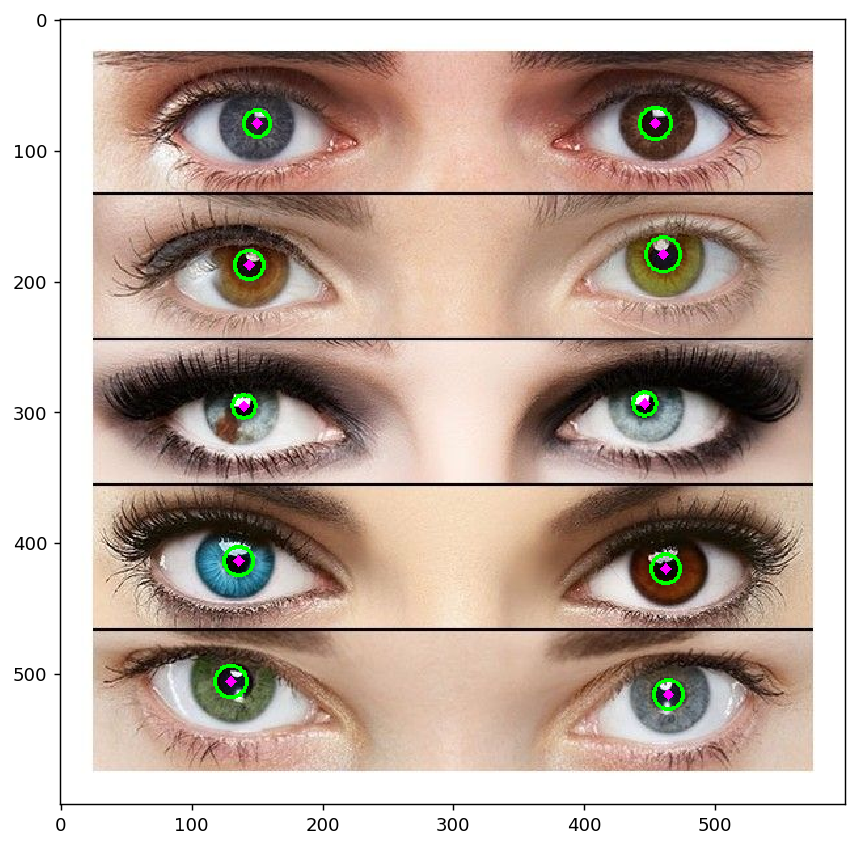

In [95]:
img_out2 = img.copy()
# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================
umbral_alto = 78
umbral_acum = 16
circles2 = cv.HoughCircles(img_binary,cv.HOUGH_GRADIENT,1,minDist=50,
                          param1=76,param2=umbral_acum,minRadius=5,maxRadius=15)

# Matriz de círculos con posición x, y, y radio, debe ser redondeada a enteros
circles2 = np.uint16(np.around(circles2))
print(circles2)

for i in circles2[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out2,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out2,(i[0],i[1]),2,(255,0,255),3)
plotear([img_out2])

[[454  80  12]
 [150  80  10]
 [460 180  13]
 [144 188  11]
 [446 294   9]
 [140 296   9]
 [136 414  11]
 [462 420  11]
 [130 506  12]
 [464 516  11]]
[0 2 6 1 9 7 8 3 5 4]


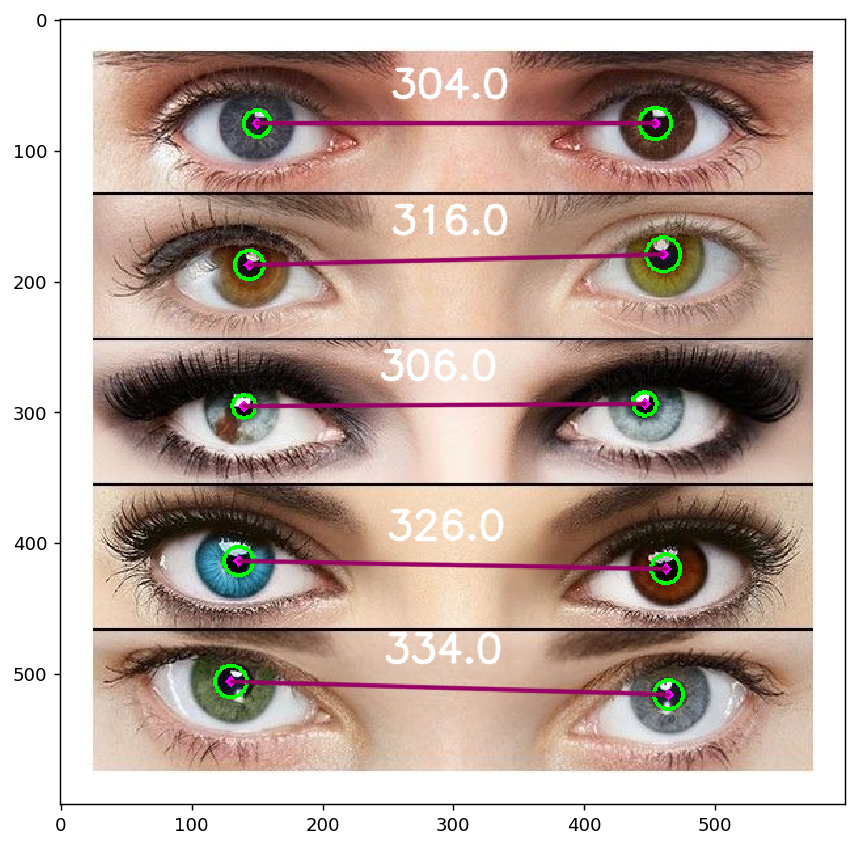

In [97]:
img_distance2 = img_out2.copy()
# Ordenamos el vector de círculos según distancia Y:
#===================================================
order2 = np.argsort(circles2[0, :, 1])
s_circles2 = circles2[0, order2]
print(s_circles2)

for i in range(int(order2.size/2)):
    eye1 = s_circles2[i*2]
    eye2 = s_circles2[i*2+1]
    dist = abs(float(eye2[0]) - float(eye1[0]))
    x_c = int((eye2[0] + eye1[0])/2) - 50
    y_c = int((eye2[1] + eye1[1])/2) - 20
    
    cv.line(img_distance2,tuple(eye1[:2]),tuple(eye2[:2]),(150,0,100),2,cv.LINE_AA)
    cv.putText(img_distance2,str(dist),(x_c,y_c),cv.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv.LINE_AA)

print(order2)
plotear([img_distance2])